In [85]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)


In [88]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [89]:
clf.score(X_test, y_test)

0.9736842105263158

In [90]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [91]:
import numpy as np

def tpr(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fn = np.sum((y_pred != class_label) & (y_true == class_label))
    return tp / (tp + fn) if (tp + fn) > 0 else 0.0

def fpr(y_pred, y_true, class_label):
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    tn = np.sum((y_pred != class_label) & (y_true != class_label))
    return fp / (fp + tn) if (fp + tn) > 0 else 0.0

def precision(y_pred, y_true, class_label):
    tp = np.sum((y_pred == class_label) & (y_true == class_label))
    fp = np.sum((y_pred == class_label) & (y_true != class_label))
    return tp / (tp + fp) if (tp + fp) > 0 else 0.0

def recall(y_pred, y_true, class_label):
    return tpr(y_pred, y_true, class_label)  # same as TPR

def f1score(y_pred, y_true, class_label):
    p = precision(y_pred, y_true, class_label)
    r = recall(y_pred, y_true, class_label)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0.0


In [92]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [93]:
y_score = clf.predict_proba(X_test)[:, 1] # target values
_, _, thresholds = roc_curve(y_test, y_score, pos_label=1)


In [94]:
results = []
y_pred = clf.predict(X_test)
for class_label in np.unique(y_test):
    label_name = iris.target_names[class_label]
    true_p = tpr(y_pred, y_test, class_label)
    false_p = fpr(y_pred, y_test, class_label)
    prec = precision(y_pred, y_test, class_label)
    rec = recall(y_pred, y_test, class_label)
    f = f1score(y_pred, y_test, class_label)

    results.append({
        "Class": label_name,
        "TPR (Recall)": round(true_p, 3),
        "FPR": round(false_p, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1 Score": round(f, 3)
    })

# --- Convert to Table ---
df_results = pd.DataFrame(results)
print(df_results)


        Class  TPR (Recall)    FPR  Precision  Recall  F1 Score
0      setosa         1.000  0.000        1.0   1.000     1.000
1  versicolor         0.938  0.000        1.0   0.938     0.968
2   virginica         1.000  0.034        0.9   1.000     0.947


In [95]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [116]:
for i in range(0,3):
    tpr, fpr, _ = roc_curve(y_test, y_score, pos_label=i)
    print(f"Class {i} - TPR: {tpr}, FPR: {fpr}, Thresholds: {thresholds}")

Class 0 - TPR: [0.   0.04 0.88 0.88 0.92 0.92 0.96 0.96 1.   1.  ], FPR: [0.         0.         0.         0.30769231 0.30769231 0.61538462
 0.61538462 0.92307692 0.92307692 1.        ], Thresholds: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Class 1 - TPR: [0.         0.         0.         0.09090909 0.09090909 1.        ], FPR: [0.     0.0625 0.9375 0.9375 1.     1.    ], Thresholds: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Class 2 - TPR: [0.         0.03448276 0.51724138 0.51724138 0.55172414 0.55172414
 0.68965517 0.68965517 0.82758621 0.82758621 0.96551724 0.96551724
 1.        ], FPR: [0.         0.         0.         0.22222222 0.22222222 0.66666667
 0.66666667 0.77777778 0.77777778 0.88888889 0.88888889 1.
 1.        ], Thresholds: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


[       inf 0.96043584 0.68576697 0.35810815 0.31207373 0.0058202 ]


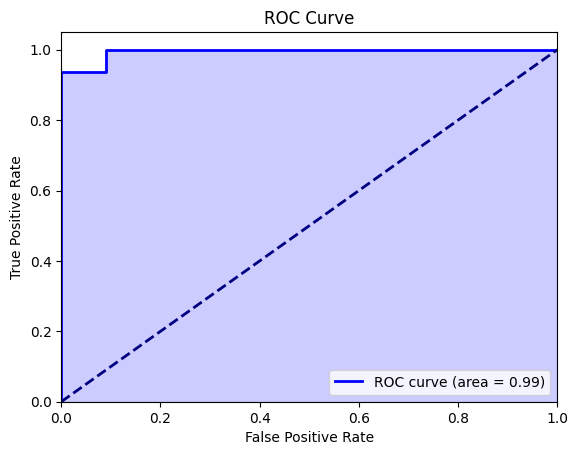

In [118]:
# Use the FPR and TPR arrays from roc_curve (cell 8)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
print(thresholds)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])    
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()